In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Credit.csv 출처<br>
https://www.kaggle.com/ishaanv/ISLR-Auto/version/1?select=Credit.csv


# Part 1. K-최근접 이웃 회귀

knn으로 limit을 활용해 balance를 예측


### [1-1]

pd.read_csv를 활용해 Credit.csv를 첫번째 열이 인덱스가 되도록 credit 변수에 저장하세요

In [4]:
credit = pd.read_csv('Credit.csv', index_col = 0) 
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### [1-2]

credit에서 필요 없는 열인 Cards,Gender,Student,Married,Ethnicity를 제거해 credit_c에 저장하세요

In [5]:
credit_c = credit.drop(['Cards', 'Gender', 'Student', 'Married', 'Ethnicity'], axis = 1)
credit_c

,Income,Limit,Rating,Age,Education,Balance
1,14.891,3606,283,34,11,333
2,106.025,6645,483,82,15,903
3,104.593,7075,514,71,11,580
4,148.924,9504,681,36,11,964
5,55.882,4897,357,68,16,331
...,...,...,...,...,...,...
396,12.096,4100,307,32,13,560
397,13.364,3838,296,65,17,480
398,57.872,4171,321,67,12,138
399,37.728,2525,192,44,13,0


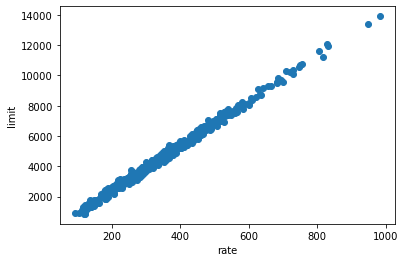

In [6]:
#데이터 분포 확인
import matplotlib.pyplot as plt
rating = credit_c["Rating"]
limit = credit_c["Limit"]

plt.scatter(rating,limit)
plt.xlabel("rate")
plt.ylabel("limit")

plt.show()

### [1-3]

credit_c에서 Rating열과 Limit열을 각각 rating과 limit변수에 저장하세요

In [7]:
rating = credit_c['Rating']
limit = credit_c['Limit']

### [1-4]

독립변수는 rating, 종속변수는 limit이 되도록 하여 train_input, test_input, train_target, test_target을 분리하세요.<br><br>
<조건> train_test_split 매서드를 활용해 random_state는 5로 하고,<br>
train_input과 test_input의 비율이 7대3이 되도록 train_input과 test_input을 분리하기

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
    train_test_split(rating, limit, test_size = 0.3, random_state = 5)

In [12]:
train_input.shape

(280,)

### [1-5]

train_input과 test_input을 2차원의 열벡터로 변경해 각각 저장하세요

In [13]:
train_input = np.array(train_input)[:, np.newaxis]
test_input = np.array(test_input)[:, np.newaxis]

### [1-6]

train_input과 train_target을 활용해 k-최근접 이웃 회귀 모델을 훈련시키고, train set과 test set에 관한 결정계수를 각각 출력하세요



In [15]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9925183448136435
0.9919222050652411


### [1-7]

sklearn.metrics 라이브러리에서 r2_score 매서드를 활용해 train set과 test set에 관한 결정계수를 각각 train_r2와 test_r2에 저장한 뒤, 각각 출력하세요

In [17]:
from sklearn.metrics import r2_score

train_r2 = r2_score(train_target, knr.predict(train_input))
test_r2 = r2_score(test_target, knr.predict(test_input))

print(train_r2)
print(test_r2)

0.9925183448136435
0.9919222050652411


# Part 2. 선형 회귀

### [2-1]
1) credit 전체에서 Rating열의 값이 700 미만인 행들만 추출해 credit_r에 저장하세요<br>
2) credit_r의 각 행에 해당하는 index를 0부터 len(credit_r)-1까지의 정수로 갱신하세요


In [20]:
credit_r = credit[credit['Rating'] < 700]
credit_r.index = np.arange(len(credit_r))

### [2-2]

1) credit_r에서 Balance열과 Rating열을 각각 balance, rating 변수에 저장하세요<br>
2) matplotlib을 활용해 x축에 balance, y축에 rating 값이 오도록 scatterplot을 그리세요

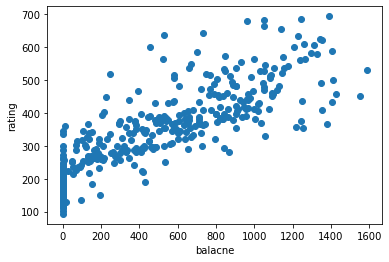

In [21]:
balance = credit_r['Balance']
rating = credit_r['Rating']

plt.scatter(balance, rating)
plt.xlabel("balacne")
plt.ylabel("rating")
plt.show()

### [2-3]

1) StandardScaler 매서드를 활용해 balance와 rating을 정규화하세요

2) 정규화한 값을 balace_scaled와 rating_scaled에 각각 저장하세요

In [23]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

balance_scaled = sscaler.fit_transform(np.array(balance).reshape(-1, 1))
rating_scaled = sscaler.fit_transform(np.array(rating).reshape(-1, 1))


### [2-4]

balance_scaled와 rating_scaled를 각각 열의 이름이 Balance와 Rating이 되도록 data라는 DataFrame에 저장하세요

In [26]:
# .flatten() : 1차원으로 변경
data = pd.DataFrame({'Balance':balance_scaled.flatten(),
                     'Rating':rating_scaled.flatten()})
data

,Balance,Rating
0,-0.356298,-0.425944
1,0.994950,1.090304
2,0.229243,1.325322
3,1.139557,2.591389
4,-0.361039,0.135068
...,...,...
381,0.181831,-0.243994
382,-0.007818,-0.327388
383,-0.818567,-0.137857
384,-1.145711,-1.115837


### [2-5]

sklearn.cluster라이브러리의 DBSCAN 매서드를 활용해(eps = 0.25, min_samples = 5로 설정하기)<br>
data를 fit_predict해서 strange 변수에 저장해주세요

In [27]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 0.25, min_samples = 5)

strange = model.fit_predict(data)
print(pd.Series(strange).value_counts())

 0    338
-1     48
dtype: int64


### [2-6]

1) credit_r에서 strange가 -1인 행들만 추출해 credit_removed 변수에 저장하세요<br><br>
2) credit_removed에서 Balance열과 Rating열을 각각 balance_r과 rating_r변수에 저장하세요

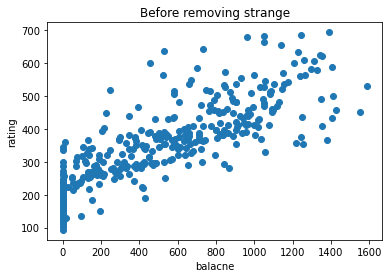

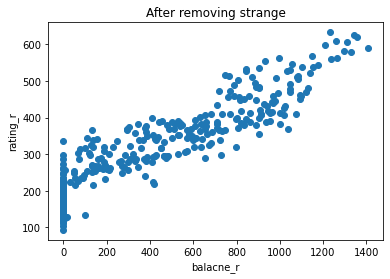

In [28]:
drop_idx = np.where(strange == -1)[0]
credit_removed = credit_r.drop(drop_idx, axis = 0)

balance_r = credit_removed['Balance']
rating_r = credit_removed['Rating']

plt.figure()
plt.scatter(balance, rating)
plt.xlabel("balacne")
plt.ylabel("rating")
plt.title("Before removing strange")
plt.show()

plt.figure()
plt.scatter(balance_r, rating_r)
plt.xlabel("balacne_r")
plt.ylabel("rating_r")
plt.title("After removing strange")
plt.show()

### [2-7]
1) x를 독립변수, y를 종속변수로 두고, train_test_split을 활용해 trin_input, test_input, train_target, test_target으로 나누세요 (random_state는 5)<br><br>
2) train_input, test_input을 2차원 열벡터로 변환해 저장하세요

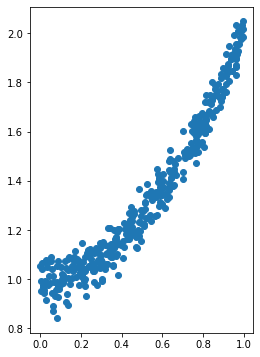

In [29]:
np.random.seed(5)
x = np.random.rand(len(credit))
y = x**2 +1 + 0.05 * np.random.randn(len(credit))
credit["x"] = x
credit["y"] = y
plt.figure(figsize = (4,6))
plt.scatter(x,y)
plt.show()


In [30]:
train_input, test_input, train_target, test_target =\
    train_test_split(x, y, random_state = 5)

train_input = np.array(train_input)[:, np.newaxis]
test_input = np.array(test_input)[:, np.newaxis]

### [2-8]

선형회귀 모델 lr1을 만들어 train set을 활용해 학습시킨 다음, train set의 스코어는 train_score1에, test set의 스코어는 test_socre1에 저장해서 출력하세요

0.9142998868450842
0.9343919316660005


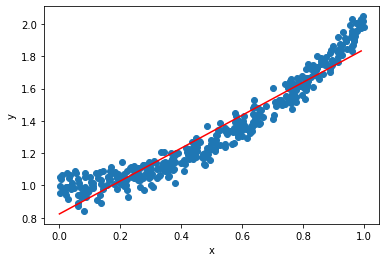

In [32]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

lr1.fit(train_input, train_target)
train_score1 = lr1.score(train_input, train_target)
test_score1 = lr1.score(test_input, test_target)
print(train_score1)
print(test_score1)

point = np.arange(0,1,0.01).reshape(-1,1)
plt.scatter(x,y)
plt.plot(point, lr1.predict(point) ,c ="r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### [2-9]

1) train_input^2을 첫번째 열로, train_input을 두번째 열로 갖는 2d array인 train_poly를 만드세요<br><br>
2) test_input^2을 첫번째 열로, test_input을 두번째 열로 갖는 2d array인 test_poly를 만드세요

In [33]:
train_poly = np.hstack((train_input**2, train_input))
test_poly = np.hstack((test_input**2, test_input))

### [2-10]

선형회귀 모델 lr2를 만들어 train_poly와 train_target을 활용해 학습시킨 후,<br> train_poly와 train_target을 통해 구한 스코어는 train_score2에, test_poly와 test_target을 통해 구한 스코어는 test_socre2에 저장해서 출력하세요

0.9731739279005787
0.9784434634493334


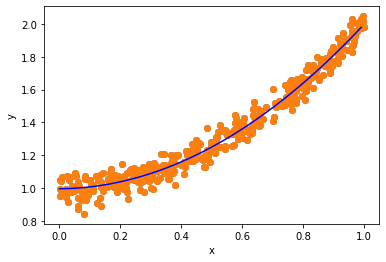

In [34]:
lr2 = LinearRegression()

lr2.fit(train_poly, train_target)

train_score2 = lr2.score(train_poly, train_target)
test_score2 = lr2.score(test_poly, test_target)

print(train_score2)
print(test_score2)

point = np.arange(0,1,0.01).reshape(-1,1)
plt.scatter(x,y)
point_input = np.column_stack((point**2,point))
plt.scatter(x,y)
plt.plot(point, lr2.predict(point_input) ,c ="b")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### [2-11]

1) matplotlib을 활용해 실제 x값과 y값의 scatterplot을 그린 후,<br>
2) train_input을 활용해 학습한 lr1에 np.arange(0,1,0.01)를 독립변수로 사용하여 도출한 예측값을 종속변수로 하는 plot을 그리세요<br>

3) train_poly를 활용해 학습한 lr2에 np.arange(0,1,0.01)를 독립변수로 사용하여 도출한 예측값을 종속변수로 하는 plot을 그리세요<br><br>

4) lr1을 사용했을 때의 트레인 스코어, 테스트 스코어와 lr2를 사용했을 때의 트레인 스코어, 테스트 스코어를 각각 비교하세요


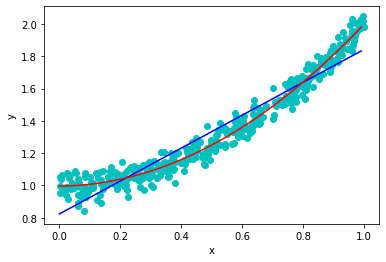

<score comparison>
train_score1 vs train_score2 :
 0.914 vs 0.973
test_score1  vs  test_score2 :
 0.934 vs 0.978


In [37]:
point = np.arange(0,1,0.01).reshape(-1,1)
point_input = np.column_stack((point**2,point))

plt.figure()
plt.scatter(x, y, c="c") 

plt.plot(point, lr1.predict(point), c = "b") 

plt.plot(point, lr2.predict(point_input), c ="r") 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("<score comparison>")
print(f"""train_score1 vs train_score2 :
 {train_score1.round(3)} vs {train_score2.round(3)}""")
print(f"""test_score1  vs  test_score2 :
 {test_score1.round(3)} vs {test_score2.round(3)}""")

## 서술형 문항
[2-3] ~ [2-5] 문제에서 DBSCAN을 사용할 때 StandardScaler를 활용해서 데이터를 정규화한 후에 DBSCAN을 활용했는데요.

이렇게 정규화를 한 후에 DBSCAN을 활용하는 이유는 무엇일까요?

<답> :  DBSCAN에서는 군집화를 하는 기준으로 유클리디안 거리리를 활용해 각 데이터별로 거리를 구한 뒤, 설정한 eps 값 이내에 해당하는 데이터끼리 군집화를 한다. 이 때 데이터가 정규화되지 않아서 해당 데이터를 나타내는 지표들의 스케일이 다르다면, 데이터 간의 실질적인 거리를 측정하기 어렵기 때문이다.